***Задача 1***

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.


In [38]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [7]:


n = 256
std = 16
mean = 80


In [10]:
p = 0.95
alpha = 1 - p

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-1.9693105698491928, 1.9693105698491928)

In [15]:
confidence_interval  = (mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

In [16]:
print(f'Доверительный интервал для оценки математического ожидания mu - {confidence_interval} ')

Доверительный интервал для оценки математического ожидания mu - (78.0306894301508, 81.9693105698492) 



***Задача 2***

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:


202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

In [50]:
l = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
alpha = 0.05

In [51]:
def statistic(l):
    return (l.mean() - 200) / (l.std(ddof=1) / np.sqrt(l.shape[0]))

In [52]:
n =l.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-2.262157162740992, 2.2621571627409915)

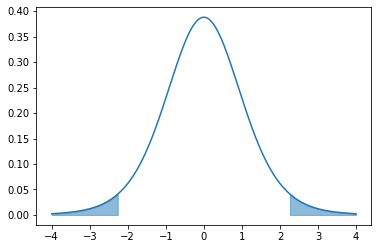

In [53]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [54]:
t = statistic(l)

In [55]:
t

-1.0651074037450896

In [56]:
# Продавец утверждает верно

1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?

In [57]:
alpha = 0.1

In [58]:
n =l.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-1.8331129326536337, 1.8331129326536335)

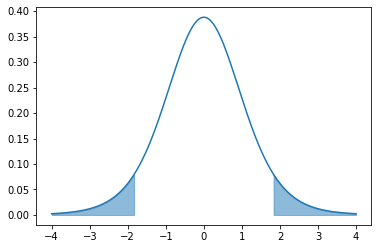

In [59]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [60]:
t = statistic(l)

In [62]:
t

-1.0651074037450896

In [63]:
# Верно  утверждение продавца при уровне значимости 1%

2. Найдите P-значение для данного теста.

In [64]:
n = l.shape[0]
S = statistic(l)

n, S

(10, -1.0651074037450896)

In [65]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue


0.31456660352472854

***Задача 3***

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

In [81]:

mean = 17.5
alpha = 0.025
n = 100
std =  np.sqrt(4)


In [82]:
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t2

2.276003474500505

In [83]:

f = (mean - 17) / (std / np.sqrt(n))

In [86]:
f

2.5

In [ ]:
# Гипотеза не верна

***Задача 4 (Дополнительно)***

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [114]:
samples =np.array ([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ])

In [130]:
alpha = 0.05

In [131]:
sample_variance = samples.var(ddof=1)

In [132]:
variance  = 0.0625

In [133]:
H = (samples.shape[0] - 1) * sample_variance / variance

In [134]:
H

28.720541753333343

In [135]:
n = samples.shape[0]

t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(11.688551922452438, 38.0756272503558)